In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sys
import warnings 
warnings.filterwarnings("ignore")

from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE

In [5]:
# Load data
train_data = pd.read_csv('train.csv', sep = ";")
test_data = pd.read_csv('test.csv', sep = ";")

In [6]:
df = pd.concat([train_data,test_data])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.8+ MB


In [8]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
df['job'].value_counts()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

In [10]:
df.rename(columns={'y': 'subscribed'}, inplace=True)
df['subscribed'].value_counts()

no     43922
yes     5810
Name: subscribed, dtype: int64

In [11]:
# Recode categorical variables
cols = ['job', 'marital', 'education','contact','poutcome','default','housing','loan']
df[cols] = df[cols].astype('category')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         49732 non-null  int64   
 1   job         49732 non-null  category
 2   marital     49732 non-null  category
 3   education   49732 non-null  category
 4   default     49732 non-null  category
 5   balance     49732 non-null  int64   
 6   housing     49732 non-null  category
 7   loan        49732 non-null  category
 8   contact     49732 non-null  category
 9   day         49732 non-null  int64   
 10  month       49732 non-null  object  
 11  duration    49732 non-null  int64   
 12  campaign    49732 non-null  int64   
 13  pdays       49732 non-null  int64   
 14  previous    49732 non-null  int64   
 15  poutcome    49732 non-null  category
 16  subscribed  49732 non-null  object  
dtypes: category(8), int64(7), object(2)
memory usage: 4.2+ MB


In [13]:
df['subscribed'].value_counts()

no     43922
yes     5810
Name: subscribed, dtype: int64

In [14]:
# Recode yes/no variable to (1,0) variable
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['subscribed'] = df['subscribed'].map({'yes': 1, 'no': 0})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   age         49732 non-null  int64   
 1   job         49732 non-null  category
 2   marital     49732 non-null  category
 3   education   49732 non-null  category
 4   default     49732 non-null  category
 5   balance     49732 non-null  int64   
 6   housing     49732 non-null  category
 7   loan        49732 non-null  category
 8   contact     49732 non-null  category
 9   day         49732 non-null  int64   
 10  month       49732 non-null  object  
 11  duration    49732 non-null  int64   
 12  campaign    49732 non-null  int64   
 13  pdays       49732 non-null  int64   
 14  previous    49732 non-null  int64   
 15  poutcome    49732 non-null  category
 16  subscribed  49732 non-null  int64   
dtypes: category(8), int64(8), object(1)
memory usage: 4.2+ MB


In [16]:
df['subscribed'].value_counts()

0    43922
1     5810
Name: subscribed, dtype: int64

In [17]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
# Recode dummy variables

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [21]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,subscribed
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892,0.116826
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838,0.321216
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


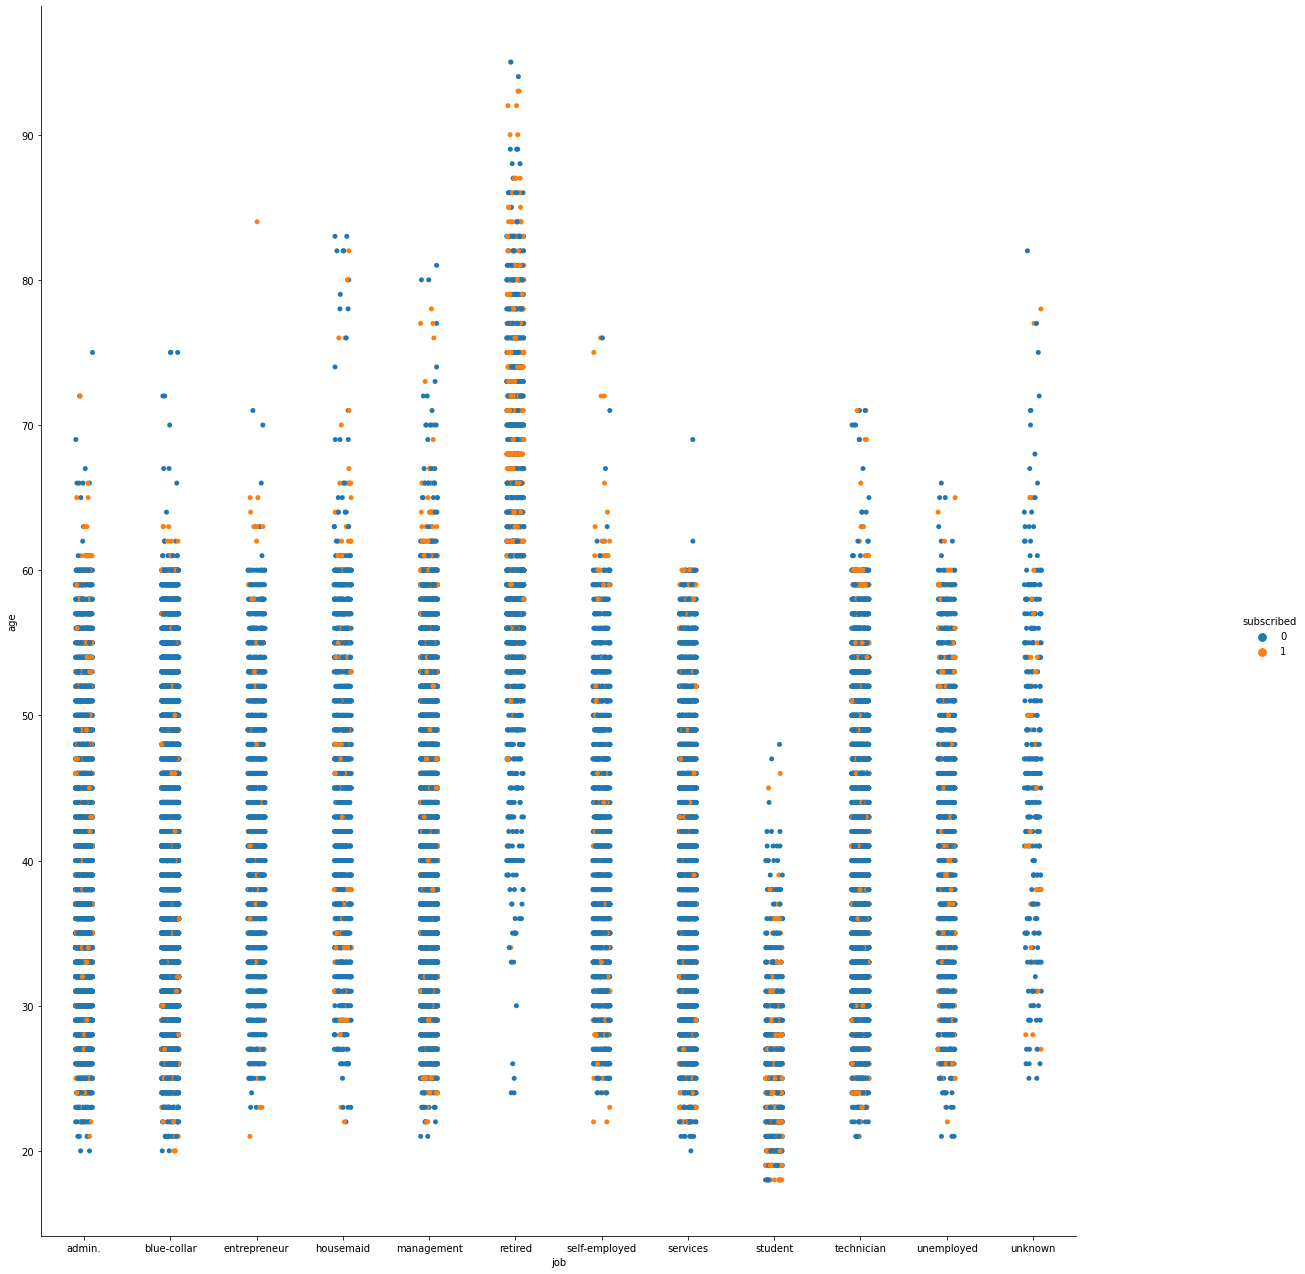

In [22]:
y_by_job = sns.catplot(x="job", y="age", hue='subscribed', data=df)
y_by_job.fig.set_figwidth(20)
y_by_job.fig.set_figheight(20)


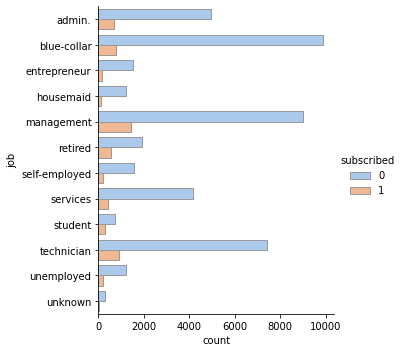

In [23]:
sns.catplot(y="job", hue="subscribed", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

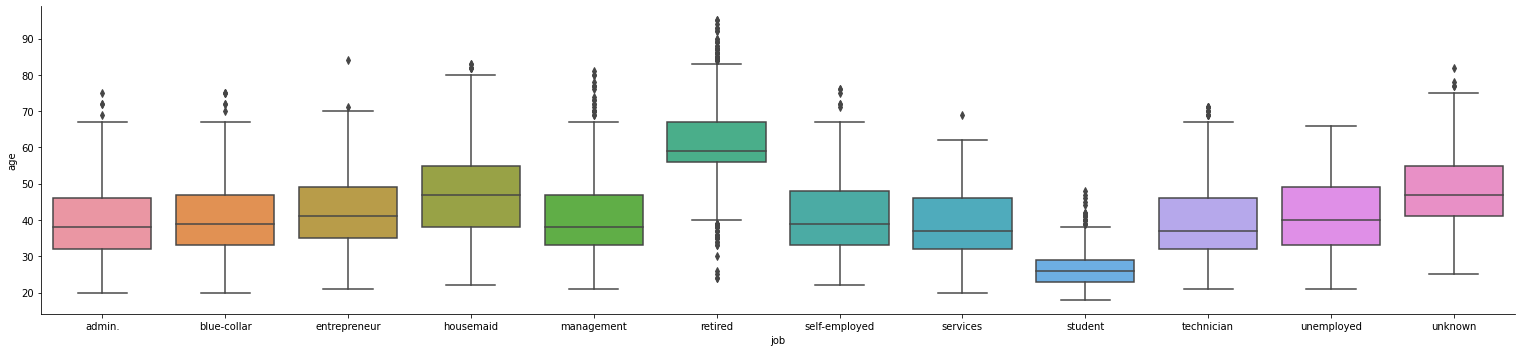

In [24]:
age_by_job = sns.catplot(x="job", y="age", kind="box", data=df)
age_by_job.fig.set_figwidth(25)
age_by_job.fig.set_figheight(5)

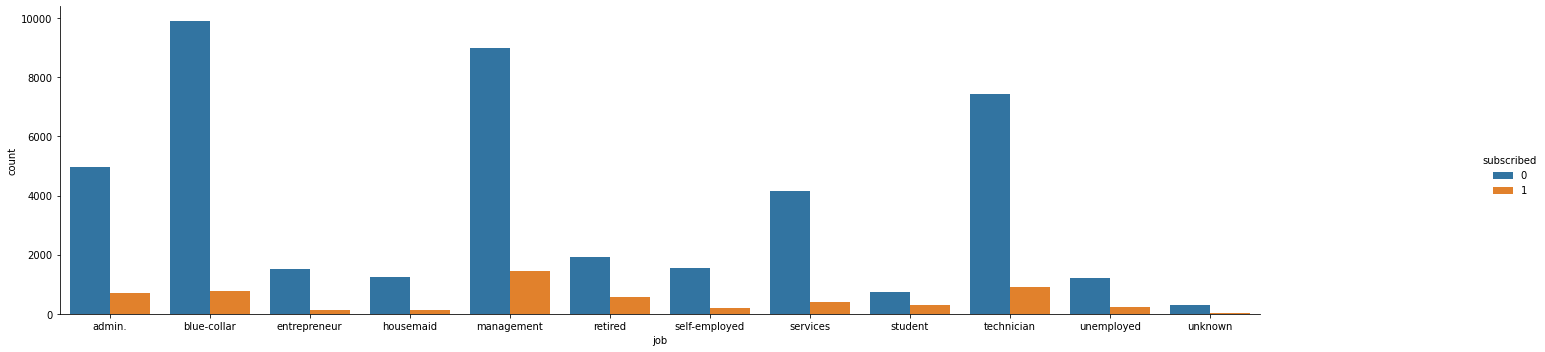

In [25]:
job_count = sns.catplot(x = 'job', hue = 'subscribed', kind = 'count', data = df)
job_count.fig.set_figwidth(25)
job_count.fig.set_figheight(5)

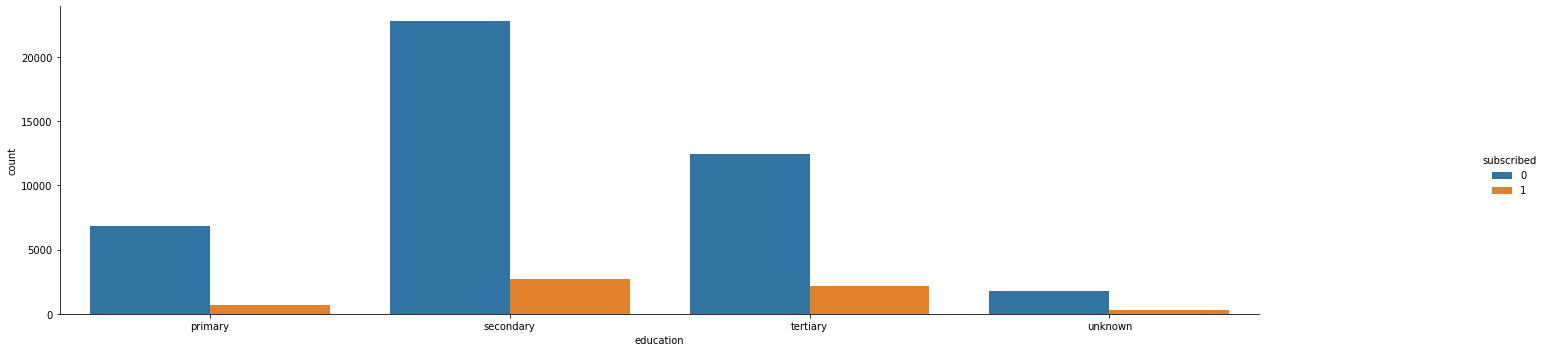

In [26]:
job_count = sns.catplot(x = 'education', hue = 'subscribed', kind = 'count', data = df)
job_count.fig.set_figwidth(25)
job_count.fig.set_figheight(5)

In [27]:
#replace unknown job with mode of job per education, since these variables are likely correlated
eduRatio = pd.DataFrame({'job' : []})
for i in df["job"].unique():
    eduRatio = eduRatio.append(df[(df["job"] == i)]["education"].value_counts().to_frame().iloc[0] * 100 / df[(df["job"] == i)]["education"].value_counts().sum())

eduRatio["Job"] = df["job"].unique()
eduRatio

df.loc[(df['job'] == "unknown"), "job"] = "blue-collar"
df.loc[(df['job'] == "unknown") & (df['education'] == "tertiary"),"job"] = "management"
df.loc[(df['job'] == "unknown") & (df['education'] == "primary"),"job"] = "housemaid"
df.loc[(df['job'] == "unknown") & (df['education'] == "secondary"),"job"] = "services"


In [28]:
#replace unknown education with mode of education per job, for the same reason as above
df.loc[(df['education'] == "unknown") & (df['job'] == "admin."),"education"] = "secondary"
df.loc[(df['education'] == "unknown") & (df['job'] == "management"),"education"] = "secondary"
df.loc[(df['education'] == "unknown") & (df['job'] == "services"),"education"] = "tertiary"
df.loc[(df['education'] == "unknown") & (df['job'] == "technician."),"education"] = "secondary"
df.loc[(df['education'] == "unknown") & (df['job'] == "retired"),"education"] = "secondary"
df.loc[(df['education'] == "unknown") & (df['job'] == "blue-collar"),"education"] = "secondary"
df.loc[(df['education'] == "unknown") & (df['job'] == "housemaid."),"education"] = "primary"
df.loc[(df['education'] == "unknown") & (df['job'] == "self-employed"),"education"] = "tertiary"
df.loc[(df['education'] == "unknown") & (df['job'] == "student"),"education"] = "secondary"
df.loc[(df['education'] == "unknown") & (df['job'] == "entrepreneur"),"education"] = "tertiary"
df.loc[(df['education'] == "unknown") & (df['job'] == "unemployed"),"education"] = "secondary"
df.loc[(df['education'] == "unknown"),"education"] = "secondary"

In [29]:
#replace "unknown" in contacts with mode
df["contact"].replace(["unknown"], df["contact"].mode(),inplace = True)

In [30]:
#because there is already a pday feature, and date data is not useful, we can drop it
df.drop(columns = ["day","month"],inplace = True)

In [31]:
df["subscribed"].value_counts()
# because there are so few 1 compared to 0, we can augment the dataset with SMOTE to allow for even spread between 0 and 1 for training

0    43922
1     5810
Name: subscribed, dtype: int64

In [32]:
df = pd.get_dummies(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  49732 non-null  int64
 1   balance              49732 non-null  int64
 2   duration             49732 non-null  int64
 3   campaign             49732 non-null  int64
 4   pdays                49732 non-null  int64
 5   previous             49732 non-null  int64
 6   subscribed           49732 non-null  int64
 7   job_admin.           49732 non-null  uint8
 8   job_blue-collar      49732 non-null  uint8
 9   job_entrepreneur     49732 non-null  uint8
 10  job_housemaid        49732 non-null  uint8
 11  job_management       49732 non-null  uint8
 12  job_retired          49732 non-null  uint8
 13  job_self-employed    49732 non-null  uint8
 14  job_services         49732 non-null  uint8
 15  job_student          49732 non-null  uint8
 16  job_technician       49

In [33]:
#plt.figure(figsize=(18,16))
#cor - df.corr()
#sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
#because the correlation matrix is so large, we can just sort from highest correlated to lowest to see if there are any variables too highly correlated with subscribed


pairs_to_drop = set()
cols = df.columns
for i in range(0, df.shape[1]):
    for j in range(0, i+1):
        pairs_to_drop.add((cols[i], cols[j]))


top_corr = df.corr().abs().unstack()
top_corr = top_corr.drop(labels=pairs_to_drop).sort_values(ascending=False)

print("Top Absolute Correlations")
print(top_corr[0:10]) # top 10 non-self correlations. As long as we don't see anything highly correlated with "subscribed", it's fine.


Top Absolute Correlations
contact_cellular     contact_telephone     1.000000
housing_0            housing_1             1.000000
loan_0               loan_1                1.000000
default_0            default_1             1.000000
pdays                poutcome_unknown      0.869758
marital_married      marital_single        0.771629
poutcome_failure     poutcome_unknown      0.738382
education_secondary  education_tertiary    0.721844
pdays                poutcome_failure      0.701718
job_management       education_tertiary    0.587708
dtype: float64


In [36]:
scaler = preprocessing.MinMaxScaler()

features = scaler.fit_transform(df.loc[:, df.columns != 'subscribed'])
labels = df['subscribed']

features , labels = SMOTE().fit_resample(features, labels)
labels.value_counts() # we can see now that 0 and 1 is balanced

0    43922
1    43922
Name: subscribed, dtype: int64

In [38]:
#evaluate machine learning functions
def evaluate_clf(clf, features, labels, num_iters=10, test_size=0.25):
    print (clf)
    accuracy = []
    precision = []
    recall = []
    first = True
    for trial in range(num_iters):
        features_train, features_test, labels_train, labels_test =\
            train_test_split(features, labels, test_size=test_size)
        clf.fit(features_train, labels_train)
        predictions = clf.predict(features_test)
        accuracy.append(accuracy_score(labels_test, predictions))
        precision.append(precision_score(labels_test, predictions))
        recall.append(recall_score(labels_test, predictions))
        if trial % 10 == 0:
            if first:
                sys.stdout.write('\nProcessing')
            sys.stdout.write('.')
            sys.stdout.flush()
            first = False

    print ("done.\n")
    print ("accuracy: {}".format(np.mean(accuracy)))
    print ("precision: {}".format(np.mean(precision)))
    print ("recall:    {}".format(np.mean(recall)))
    return [np.mean(accuracy),np.mean(precision),np.mean(recall)]

In [39]:
from sklearn.naive_bayes import GaussianNB
g_clf = Pipeline(steps=[
    ('scaler',StandardScaler()),
    ('classifier',GaussianNB())])
                 
g_scores = evaluate_clf(g_clf, features, labels)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])

Processing.done.

accuracy: 0.7310368380310551
precision: 0.7339918247514119
recall:    0.7262676576210506


In [40]:
from sklearn.linear_model import LogisticRegression

l_clf = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression(C=1e-08, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, 
max_iter=100, multi_class='ovr', penalty='l2', random_state=42, solver='liblinear', tol=0.001, verbose=0))])

l_scores = evaluate_clf(l_clf, features, labels)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(C=1e-08, multi_class='ovr', random_state=42,
                                    solver='liblinear', tol=0.001))])

Processing.done.

accuracy: 0.7452666089886618
precision: 0.7574713567025946
recall:    0.7214589277668192


In [41]:
from sklearn.cluster import KMeans
k_clf = KMeans(n_clusters=2, tol=0.001)
k_clf_scores = evaluate_clf(k_clf, features, labels)

KMeans(n_clusters=2, tol=0.001)

Processing.done.

accuracy: 0.5421519967214607
precision: 0.5373148696258236
recall:    0.5541009835705341


In [42]:
from sklearn.svm import SVC
s_clf = SVC(kernel='rbf', C=1000,gamma = 0.0001,random_state = 42, class_weight = 'balanced')
s_clf_scores = evaluate_clf(s_clf, features, labels, num_iters=3)

SVC(C=1000, class_weight='balanced', gamma=0.0001, random_state=42)

Processing.done.

accuracy: 0.8162500189730278
precision: 0.8266788125046536
recall:    0.799684980471103


In [43]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(max_depth = 5,max_features = 'sqrt',n_estimators = 10, random_state = 42)
rf_clf_scores = evaluate_clf(rf_clf, features, labels)

RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=10,
                       random_state=42)

Processing.done.

accuracy: 0.8298711351942079
precision: 0.8201734825205611
recall:    0.8456319685987281


In [44]:
from sklearn.ensemble  import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,random_state = 42)
gb_clf_scores = evaluate_clf(gb_clf, features, labels, num_iters=3)

GradientBoostingClassifier(random_state=42)

Processing.done.

accuracy: 0.8864502223638876
precision: 0.8830129188386082
recall:    0.8912869837188616


In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=None, max_features=None, min_samples_split = 20)
dt_clf_scores = evaluate_clf(dt_clf,features, labels)

DecisionTreeClassifier(criterion='entropy', min_samples_split=20)

Processing.done.

accuracy: 0.8873503028095259
precision: 0.8930688851495472
recall:    0.880670078999597


In [46]:
from sklearn.linear_model  import SGDClassifier
sgd_clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd_clf_scores = evaluate_clf(sgd_clf, features, labels)

SGDClassifier(max_iter=5)

Processing.done.

accuracy: 0.808997768771914
precision: 0.8132127197711819
recall:    0.8038664369077491


In [47]:
from sklearn.ensemble import AdaBoostClassifier
adc_clf=AdaBoostClassifier(random_state=42)
adc_clf_scores=evaluate_clf(adc_clf, features, labels)

AdaBoostClassifier(random_state=42)

Processing.done.

accuracy: 0.8667364874094987
precision: 0.8709421866910712
recall:    0.8612852784313377


In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf_scores = evaluate_clf(knn_clf, features, labels)

KNeighborsClassifier(n_neighbors=3)

Processing.done.

accuracy: 0.8950730841036384
precision: 0.8542494361249379
recall:    0.9521213396734971


In [49]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svm_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_clf_scores = evaluate_clf(svm_clf, features, labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Processing.done.

accuracy: 0.8526433222530849
precision: 0.835345712075533
recall:    0.8792366973225387


In [50]:
lst_scores = [g_scores, l_scores, k_clf_scores, s_clf_scores, rf_clf_scores, gb_clf_scores, dt_clf_scores, sgd_clf_scores,adc_clf_scores, knn_clf_scores, svm_clf_scores]

df_scores = pd.DataFrame(lst_scores, columns =['Accuracy', 'Precision', 'Recall'],index=[
    "Gaussian Naive Bayes Classifier",
    "Logistic Regression Classifier",
    "K-means Clustering",
    "Support Vector Machine Classifier",
    "Random Forest",
    "Gradient Boosting Classifier",
    "Decision Tree",
    "Stochastic Gradient Descent (SGD)",
    "Adaboost Classifier",
    "K-Nearest Neighbour",
    "Linear Support Vector Machine"
])

df_scores=df_scores.round(2)
df_scores

def color_results_green(val):
    color = 'green' if val >= 0.48 else 'black'
    return 'color: %s' % color

In [51]:
def color_results_green(val):
    color = 'green' if val >= 0.48 else 'black'
    return 'color: %s' % color

d = dict.fromkeys(df_scores.select_dtypes('float').columns, "{:.2}")
df_scores.style.applymap(color_results_green, subset=pd.IndexSlice[:, ['Precision', 'Recall']]).format(d)

,Accuracy,Precision,Recall
Gaussian Naive Bayes Classifier,0.73,0.73,0.73
Logistic Regression Classifier,0.75,0.76,0.72
K-means Clustering,0.54,0.54,0.55
Support Vector Machine Classifier,0.82,0.83,0.8
Random Forest,0.83,0.82,0.85
Gradient Boosting Classifier,0.89,0.88,0.89
Decision Tree,0.89,0.89,0.88
Stochastic Gradient Descent (SGD),0.81,0.81,0.8
Adaboost Classifier,0.87,0.87,0.86
K-Nearest Neighbour,0.9,0.85,0.95
